# Create graphs to look for trends in Airbnb annual average rates

In [1]:
# Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import json
from config import gkey

import folium
from folium.plugins import HeatMap
import os

In [2]:
# Load csv file into a dataframe
df = pd.read_csv("Data/airbnbdataanalysis.csv")
df.head()

,neighbourhood,Listings_2015,Listings_2016,Listings_2017,STR_2015,STR_2016,STR_2017,District
0,Bayview,84,126,117,46374.21,58118.04,45354.45,Southern
1,Bernal Heights,156,191,222,68704.42,77447.15,72724.98,Southern
2,Castro/Upper Market,191,246,231,84268.13,97370.54,90733.81,Southern
3,Chinatown,78,123,129,91821.37,108057.51,99129.42,Downtown
4,Crocker Amazon,46,51,52,47207.84,43735.51,35399.72,Southern


## Graph by neighbourhood

In [3]:
# Create a function for plotting bar graphs
# str is the substring of the relevant column header
def bargraphs(df, str): 
    ax = df.plot.bar(x = "neighbourhood", 
                 y = [i for i in df.filter(regex = str)], # select column headers with substring
                 subplots = True,
                 figsize = (8,15), title = ["", "", ""])
    return ax

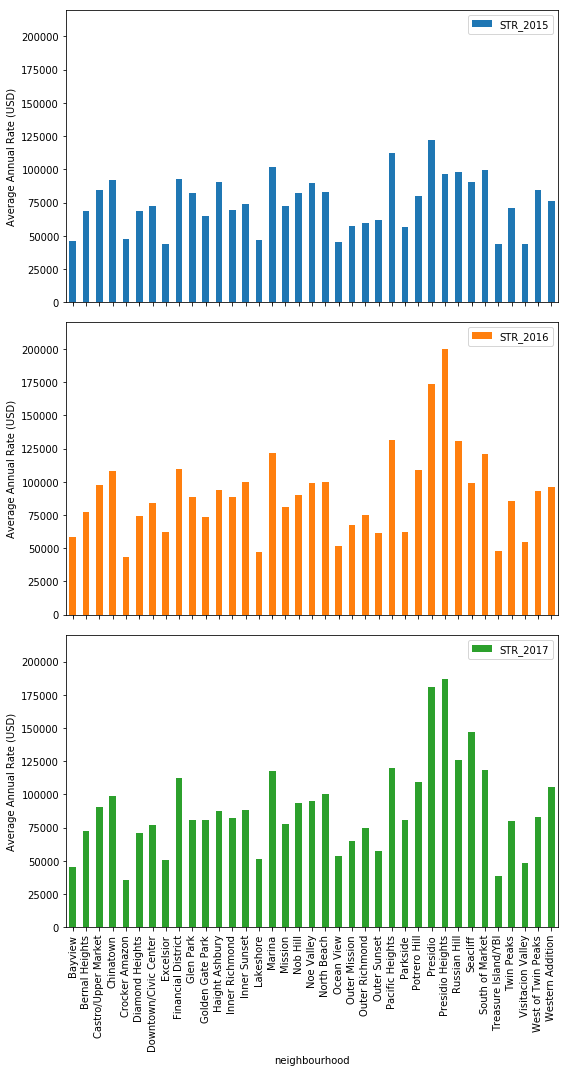

In [4]:
# Plot the short-term rental rates across neighbourhoods
bar_STR = bargraphs(df,"STR")

for yr in range(0, len(bar_STR)): # loop through all subplots in ax (there are three, corresponding to the years)
    bar_STR[yr].set_ylabel("Average Annual Rate (USD)")
    bar_STR[yr].set_ylim(0, 220000)

# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_annual_avg.svg")
plt.savefig("Images/Airbnb_annual_avg.png")

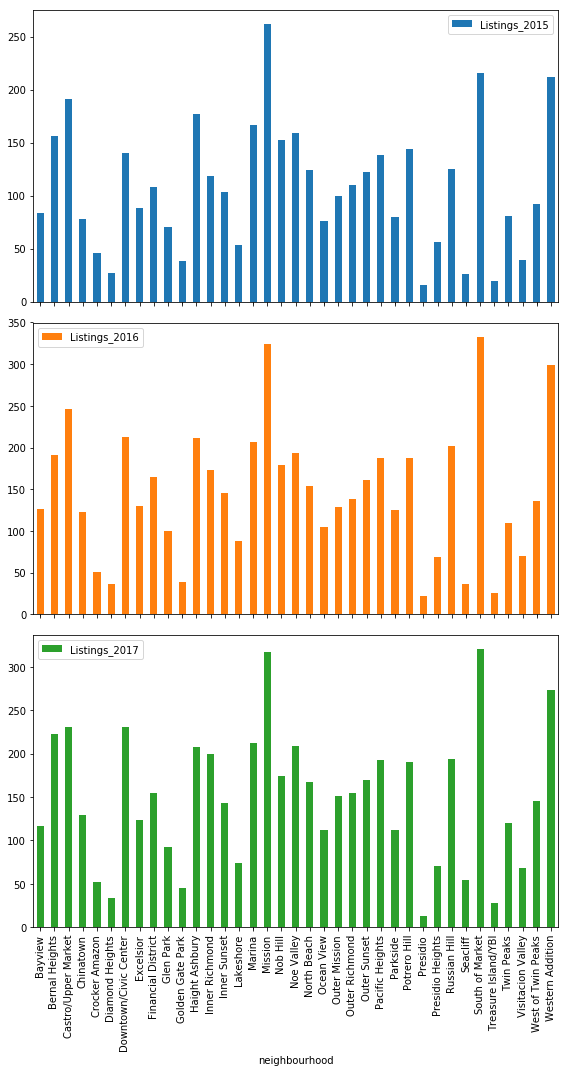

In [5]:
# Plot number of listings for 2015–2017 in subplots
bar_Listings = bargraphs(df,"Listings")

for yr in range(0, len(bar_Listings)): # loop through all subplots in ax (there are three, corresponding to the years)
    bar_STR[yr].set_ylabel("No. of listings")
    bar_STR[yr].set_ylim(0, 400)

# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_neighbourhood_listings.svg")
plt.savefig("Images/Airbnb_neighbourhood_listings.png")

## Graph by district

In [6]:
# Group the data by neighbourhood
df2 = round(df.groupby("District").mean(),2)
df2.reset_index()

,District,Listings_2015,Listings_2016,Listings_2017,STR_2015,STR_2016,STR_2017
0,Downtown,136.33,194.50,195.83,86925.70,102187.23,100009.63
1,North Downtown,86.83,119.00,118.50,95777.05,134296.23,128307.98
2,Outside Lands,80.67,112.22,118.22,63293.06,73177.32,79595.16
3,Southern,109.93,145.07,148.00,67031.51,77966.57,71731.87
4,Western Addition,194.50,255.00,240.00,83030.29,95180.90,96371.37


In [7]:
# Define a function that creates bargraphs by district
# str is the substring of the relevant column header

def bargraphs2(df, str):
    ax2 = df.plot.bar(y = [i for i in df.filter(regex = str)], figsize = (8, 8))
    return ax2

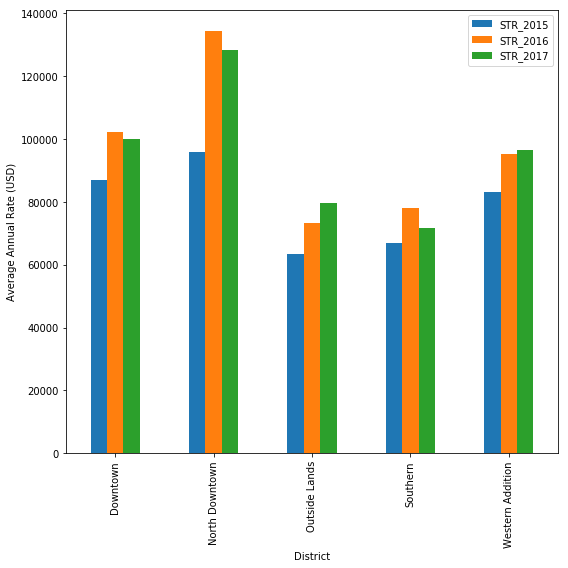

In [8]:
# Plot annual average rate of Airbnb
bargr_STR = bargraphs2(df2, "STR")
bargr_STR.set_ylabel("Average Annual Rate (USD)")

# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_annual_avg2.svg")
plt.savefig("Images/Airbnb_annual_avg2.png")

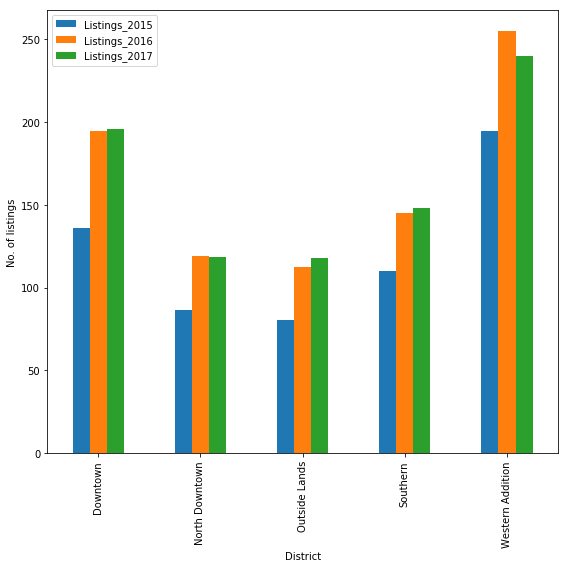

In [9]:
# Plot annual number of listings of short-term rentals
bargr_Listings = bargraphs2(df2, "Listings")
bargr_Listings.set_ylabel("No. of listings")

# Save file as svg
plt.tight_layout()
plt.savefig("Images/Airbnb_district_listings.svg")
plt.savefig("Images/Airbnb_district_listings.png")

## Heatmaps of neighbourhoods and short-term rental rates

In [10]:
# Add columns for geolocations per neighbourhood
df["City"] = "San Francisco"
df["Lat"] = ""
df["Long"] = ""
df.head()

,neighbourhood,Listings_2015,Listings_2016,Listings_2017,STR_2015,STR_2016,STR_2017,District,City,Lat,Long
0,Bayview,84,126,117,46374.21,58118.04,45354.45,Southern,San Francisco,,
1,Bernal Heights,156,191,222,68704.42,77447.15,72724.98,Southern,San Francisco,,
2,Castro/Upper Market,191,246,231,84268.13,97370.54,90733.81,Southern,San Francisco,,
3,Chinatown,78,123,129,91821.37,108057.51,99129.42,Downtown,San Francisco,,
4,Crocker Amazon,46,51,52,47207.84,43735.51,35399.72,Southern,San Francisco,,


In [11]:
# Add coordinates per neighbourhood
for index, row in df.iterrows():
    city = row["City"]
    neighborhood = row["neighbourhood"]
    
    url = f"https://maps.googleapis.com/maps/api/geocode/json?address={neighborhood}&{city}&key={gkey}"
    response_json = requests.get(url).json()


    #pprint(response_json)    
    
    df.loc[index,"Lat"] = response_json["results"][0]["geometry"]["location"]["lat"]
    df.loc[index,"Long"] = response_json["results"][0]["geometry"]["location"]["lng"]

In [12]:
# Print the dataframe
df.head()

,neighbourhood,Listings_2015,Listings_2016,Listings_2017,STR_2015,STR_2016,STR_2017,District,City,Lat,Long
0,Bayview,84,126,117,46374.21,58118.04,45354.45,Southern,San Francisco,37.7304,-122.384
1,Bernal Heights,156,191,222,68704.42,77447.15,72724.98,Southern,San Francisco,37.7389,-122.415
2,Castro/Upper Market,191,246,231,84268.13,97370.54,90733.81,Southern,San Francisco,37.7638,-122.434
3,Chinatown,78,123,129,91821.37,108057.51,99129.42,Downtown,San Francisco,42.3501,-71.0624
4,Crocker Amazon,46,51,52,47207.84,43735.51,35399.72,Southern,San Francisco,37.712,-122.438


In [13]:
# Create the heatmap for listings (2015)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount= float(df["Listings_2017"].max())

hmap_2015 = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2015 = HeatMap( list(zip(df["Lat"], df["Long"], df["Listings_2015"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2015.add_child(hm_wide_2015)

# Save file
hmap_2015.save(os.path.join('Images', 'heatmap_listings_2015.html'))

In [14]:
# Create the heatmap for listings (2016)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount= float(df["Listings_2017"].max())

hmap_2016 = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2016 = HeatMap( list(zip(df["Lat"], df["Long"], df["Listings_2016"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2016.add_child(hm_wide_2016)

# Save file
hmap_2016.save(os.path.join('Images', 'heatmap_listings_2016.html'))

In [15]:
# Create the heatmap for listings (2017)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount= float(df["Listings_2017"].max())

hmap_2017 = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2017 = HeatMap( list(zip(df["Lat"], df["Long"], df["Listings_2017"])),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2017.add_child(hm_wide_2017)

# Save file
hmap_2017.save(os.path.join('Images', 'heatmap_listings_2017.html'))

In [16]:
# Create the heatmap for rental rates (2015)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python 

max_amount_r = float(df["STR_2017"].max())

hmap_2015r = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2015r = HeatMap( list(zip(df["Lat"], df["Long"], df["STR_2015"])),
                   min_opacity=0.2,
                   max_val=max_amount_r,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2015r.add_child(hm_wide_2015r)

# Save file
hmap_2015r.save(os.path.join('Images', 'heatmap_str_rate_2015.html'))

In [17]:
# Create the heatmap for rental rates (2016)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount_r= float(df["STR_2017"].max())

hmap_2016r = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2016r = HeatMap( list(zip(df["Lat"], df["Long"], df["STR_2016"])),
                   min_opacity=0.2,
                   max_val=max_amount_r,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2016r.add_child(hm_wide_2016r)

# Save file
hmap_2016r.save(os.path.join('Images', 'heatmap_str_rate_2016.html'))

In [18]:
# Create the heatmap for rental rates (2017)
# Resource: https://alcidanalytics.com/p/geographic-heatmap-in-python

max_amount_r= float(df["STR_2017"].max())

hmap_2017r = folium.Map(location=[37.7749, -122.419], zoom_start= 11, )

hm_wide_2017r = HeatMap( list(zip(df["Lat"], df["Long"], df["STR_2017"])),
                   min_opacity=0.2,
                   max_val=max_amount_r,
                   radius=25, blur=27, 
                   max_zoom=1, 
                 )

hmap_2017r.add_child(hm_wide_2017r)

# Save file
hmap_2017r.save(os.path.join('Images', 'heatmap_str_rate_2017.html'))